<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> <font color="blue"> Solutions for </font>Grover's Search: One Qubit Representation </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

<a id="task1"></a>
<h3> Task 1 </h3>

Execute Grover's search algorithm for 5 steps where $ N = 16 $ and the first element is marked.

Draw all quantum states on the unit circle during the execution.

Print the angle of each state in degree (use $\sin^{-1}$), and check whether there is any pattern created by the oracle and inversion operators?

Is there any pattern for each step of Grover's algorithm?

<h3> Solution </h3>

In [2]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

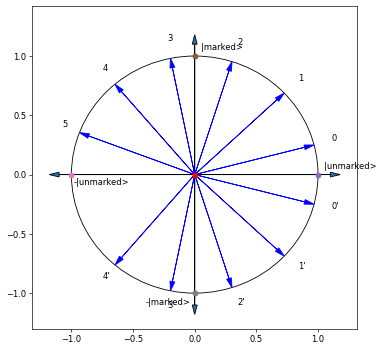

angles in degree
14.477512185929923
-14.477512185929923
43.432536557789774
-43.432536557789774
72.38756092964962
-72.38756092964962
78.65741469849054
-78.65741469849054
49.702390326630685
-49.702390326630685
20.74736595477084


In [3]:
from math import asin, pi

# initial values
iteration = 5
N = 16
marked_elements = [0]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

x = elements[N-1] * ((N-k)**0.5)
y = elements[0] * (k**0.5)
states_on_unit_circle.append([x,y,"0"])

# Execute Grover's search algorithm for $iteration steps
for step in range(iteration):
    # query
    elements = query(elements,marked_elements)
    x = elements[N-1] * ((N-k)**0.5)
    y = elements[0] * (k**0.5)
    states_on_unit_circle.append([x,y,str(step)+"'"])
    # inversion
    elements = inversion(elements)
    x = elements[N-1] * ((N-k)**0.5)
    y = elements[0] * (k**0.5)
    states_on_unit_circle.append([x,y,str(step+1)])

# draw all states
%run quantum.py
draw_qubit_grover()
for state in states_on_unit_circle:
    draw_quantum_state(state[0],state[1],state[2])
show_plt()
    
# print the angles
print("angles in degree")
for state in states_on_unit_circle:
    print(asin(state[1])/pi*180)

#### Observations

The operator oracle is a reflection over the $x$-axis.

The operator inversion is a reflection over the initial state.

If the angle of the first state $ \theta $, then each step of Grover's algorithm is a rotation with angle $ 2 \theta $.

<hr>

<a id="task2"></a>
<h3> Task 2 </h3>

In Task 1, after which step the probability of observing a marked element is the highest?

<h3> Solution </h3>

As can be verified from the angles, after the third step, the probability of observing a marking element is the highest. 

<hr>

<a id="task3"></a>
<h3> Task 3 </h3>

We have a list of size $ N = 128 $. We iterate Grover's search algorithm 10 steps.

Visually determine (i.e., Tasks 1 & 2) the good number of iterations if the number of marked elements is 1, 2, 4, or 8. (The quantum state on the unit circle should be close to the $y$-axis.)

<h3> Solution </h3>

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

In [ ]:
from math import asin, pi

# initial values
iteration = 10
N = 128

# try each case one by one
marked_elements = [0]
#marked_elements = [0,1]
#marked_elements = [0,1,2,3]
#marked_elements = [0,1,2,3,4,5,6,7]

k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)


x = elements[N-1] * ((N-k)**0.5)
y = elements[0] * (k**0.5)
states_on_unit_circle.append([x,y,"0"])

# Execute Grover's search algorithm for $iteration steps
for step in range(iteration):
    # query
    elements = query(elements,marked_elements)
    x = elements[N-1] * ((N-k)**0.5)
    y = elements[0] * (k**0.5)
    states_on_unit_circle.append([x,y,str(step)+"''"])
    # inversion
    elements = inversion(elements)
    x = elements[N-1] * ((N-k)**0.5)
    y = elements[0] * (k**0.5)
    states_on_unit_circle.append([x,y,str(step+1)])

# draw all states
%run quantum.py
draw_qubit_grover()
for state in states_on_unit_circle:
    draw_quantum_state(state[0],state[1],state[2])
show_plt()

# print the angles
print("angles in degree")
for state in states_on_unit_circle:
    print(asin(state[1])/pi*180)

#### Observations

The good number of iterations
- For $ k = 1 $, $ 8 $ iterations
- For $ k = 2 $, $ 6 $ iterations
- For $ k = 4 $, $ 4 $ iterations
- For $ k = 8 $, $ 3 $ or $ 9 $ iterations

<hr>

<a id="task4"></a>
<h3> Task 4 </h3>

We have a list of size $ N = 256 $. We iterate Grover's search algorithm 20 (or 10) steps.

Visually determine (i.e., Tasks 1 & 2) the good number of iterations if the number of marked elements is 1, 2, 4, or 8. (The quantum state on the unit circle should be close to the $y$-axis.)

<h3> Solution </h3>

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

In [ ]:
from math import asin, pi

# initial values
iteration = 20
#iteration = 10
N = 256

# try each case one by one
marked_elements = [0]
#marked_elements = [0,1]
#marked_elements = [0,1,2,3]
#marked_elements = [0,1,2,3,4,5,6,7]

k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)


x = elements[N-1] * ((N-k)**0.5)
y = elements[0] * (k**0.5)
states_on_unit_circle.append([x,y,"0"])

# Execute Grover's search algorithm for $iteration steps
for step in range(iteration):
    # query
    elements = query(elements,marked_elements)
    x = elements[N-1] * ((N-k)**0.5)
    y = elements[0] * (k**0.5)
    states_on_unit_circle.append([x,y,str(step)+"''"])
    # inversion
    elements = inversion(elements)
    x = elements[N-1] * ((N-k)**0.5)
    y = elements[0] * (k**0.5)
    states_on_unit_circle.append([x,y,str(step+1)])

# draw all states
%run quantum.py
draw_qubit_grover()
for state in states_on_unit_circle:
    draw_quantum_state(state[0],state[1],state[2])
show_plt()

# print the angles
print("angles in degree")
for state in states_on_unit_circle:
    print(asin(state[1])/pi*180)

#### Observations

The good number of iterations
- For $ k = 1 $, $ 12 $ iterations
- For $ k = 2 $, $ 8 $ iterations
- For $ k = 4 $, $ 6 $ iterations
- For $ k = 8 $, $ 4 $ iterations